<H1><center>Mental Health during Lockdown</center></H1>
<H5>Adarsh Suresh 2048001<br>
Tony Jose 2048021<br>
_______________________________________________________________________________________________________________________________

### Importing modules

In [1]:
#Pandas and Numpy
import pandas as pd
import numpy as np

#Ploting graphs
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import *

#Model bulding
from sklearn.naive_bayes import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#Sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

#Validations
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import *

#Counters
from collections import Counter

### Loading dataset

In [2]:
data=pd.read_csv("Working file of Mental Health during Lockdown - Form Responses 1.csv")
data.head()

,Timestamp,Name,Age,Gender,State,Where do you live,Marital Status,Occupation,Time spend on electronic devices,How often do you feel lonely,...,Does your day-to-day work routine affect your stress level?,Where do you think the stress levels are experienced more?,Do you lack energy and motivation?,Have you had thoughts about harming yourself after being stressed out?,Do you have trouble getting to sleep and staying asleep?,What are your coping strategies to overcome this stress?,Were you affected by covid19?,Did you face any physical health issues other than covid19 during lockdown? If yes please specify else mention no,Did you experience some or all of the following? (Tick all the applicable options).,What about managing finance during lockdown?
0,NaN,NaN,18-25,Male,Delhi,Urban,Single,Student,Often,3,...,Yes,Home,Yes,Yes,Yes,Drink alcohol or smoke,No,0,"Stress, Anxiety, Suicidal Thoughts",It was extremely difficult
1,NaN,NaN,18-25,Male,Kerala,Urban,Single,Student,Always,2,...,Yes,Workplace,Yes,No,Yes,Other,No,1,"Stress, Depression, Anxiety",I didn't face any difficulty
2,NaN,NaN,26-32,Male,Kerala,Rural,Single,Student,Often,2,...,Sometimes,Workplace,Yes,No,Sometimes,"Exercise(Yoga, Workout, Walk)",No,0,"Stress, Depression",It was quite difficult
3,NaN,NaN,Below 18,Male,Kerala,Rural,Single,Student,Often,2,...,Yes,Other,Sometimes,No,Yes,Talk about your issues to someone,No,0,Stress,It was manageable
4,NaN,NaN,26-32,Male,Kerala,Rural,Single,Student,Often,4,...,Yes,Home,Sometimes,No,Yes,Other,No,0,"Stress, Anxiety",It was extremely difficult


### EDA

In [3]:
data=data.drop(["Timestamp","Name"],axis=1)
data.head()

,Age,Gender,State,Where do you live,Marital Status,Occupation,Time spend on electronic devices,How often do you feel lonely,How often do you feel stressed?,Does your day-to-day work routine affect your stress level?,Where do you think the stress levels are experienced more?,Do you lack energy and motivation?,Have you had thoughts about harming yourself after being stressed out?,Do you have trouble getting to sleep and staying asleep?,What are your coping strategies to overcome this stress?,Were you affected by covid19?,Did you face any physical health issues other than covid19 during lockdown? If yes please specify else mention no,Did you experience some or all of the following? (Tick all the applicable options).,What about managing finance during lockdown?
0,18-25,Male,Delhi,Urban,Single,Student,Often,3,Often,Yes,Home,Yes,Yes,Yes,Drink alcohol or smoke,No,0,"Stress, Anxiety, Suicidal Thoughts",It was extremely difficult
1,18-25,Male,Kerala,Urban,Single,Student,Always,2,Often,Yes,Workplace,Yes,No,Yes,Other,No,1,"Stress, Depression, Anxiety",I didn't face any difficulty
2,26-32,Male,Kerala,Rural,Single,Student,Often,2,Sometimes,Sometimes,Workplace,Yes,No,Sometimes,"Exercise(Yoga, Workout, Walk)",No,0,"Stress, Depression",It was quite difficult
3,Below 18,Male,Kerala,Rural,Single,Student,Often,2,Sometimes,Yes,Other,Sometimes,No,Yes,Talk about your issues to someone,No,0,Stress,It was manageable
4,26-32,Male,Kerala,Rural,Single,Student,Often,4,Often,Yes,Home,Sometimes,No,Yes,Other,No,0,"Stress, Anxiety",It was extremely difficult


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 19 columns):
 #   Column                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                              --------------  ----- 
 0   Age                                                                                                                 471 non-null    object
 1   Gender                                                                                                              471 non-null    object
 2   State                                                                                                               471 non-null    object
 3   Where do you live                                                                                                   471 non-null    object
 4   Marital Status            

In [5]:
data.isna().sum()

Age                                                                                                                   0
Gender                                                                                                                0
State                                                                                                                 0
Where do you live                                                                                                     0
Marital Status                                                                                                        0
Occupation                                                                                                            0
Time spend on electronic devices                                                                                      0
How often do you feel lonely                                                                                          0
How often do you feel stressed?         

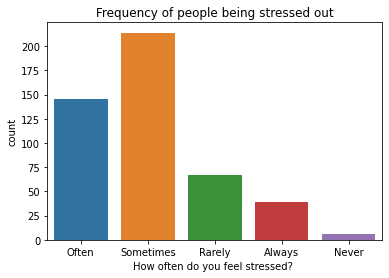

In [6]:
sns.countplot(x=data["How often do you feel stressed? "])
plt.title("Frequency of people being stressed out")
plt.show()

Here we can see that most of the people were stressed during the COVID19 lockdown time. Only a few number of people reported, of never feeling stressed.

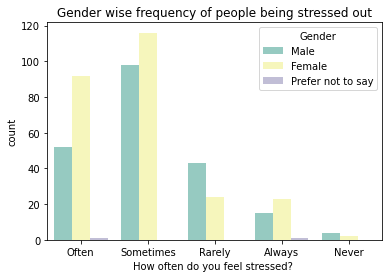

In [7]:
sns.countplot(x=data["How often do you feel stressed? "],hue=data["Gender"],palette="Set3")
plt.title("Gender wise frequency of people being stressed out")
plt.show()

From the above graph, we can conclude that women felt more stress then men during the lockdowm.

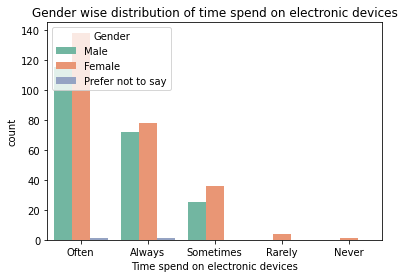

In [8]:
sns.countplot(x=data["Time spend on electronic devices"],hue=data["Gender"],palette="Set2")
plt.title("Gender wise distribution of time spend on electronic devices")
plt.show()

Here we can see that, most of the people in all the gender catagory used electronic devices frequently. Only few female said they used electronic device rarely.

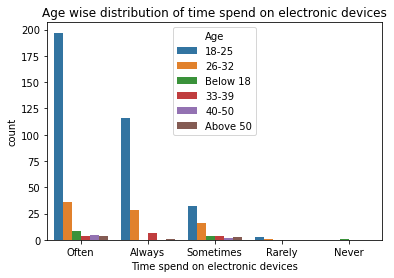

In [9]:
sns.countplot(x=data["Time spend on electronic devices"],hue=data["Age"])
plt.title("Age wise distribution of time spend on electronic devices")
plt.show()

People in the age group of 18-25, used electronic devices more when compared with other age groups. It is very clear that people aged more then 50 has a very less tendency to use electronic devices.

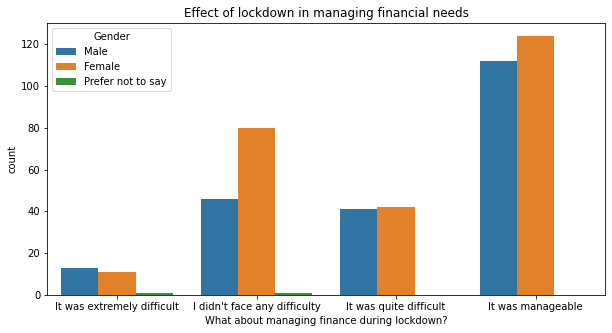

In [10]:
fig,ax = plt.subplots(figsize = (10,5))
sns.countplot(x=data["What about managing finance during lockdown?"],hue=data["Gender"])
plt.title("Effect of lockdown in managing financial needs")
plt.show()

Most of the people who participated in the survey didn't face much of finacial crisis. But then more the 25% of the people had difficulites in managing their finacial needs. 

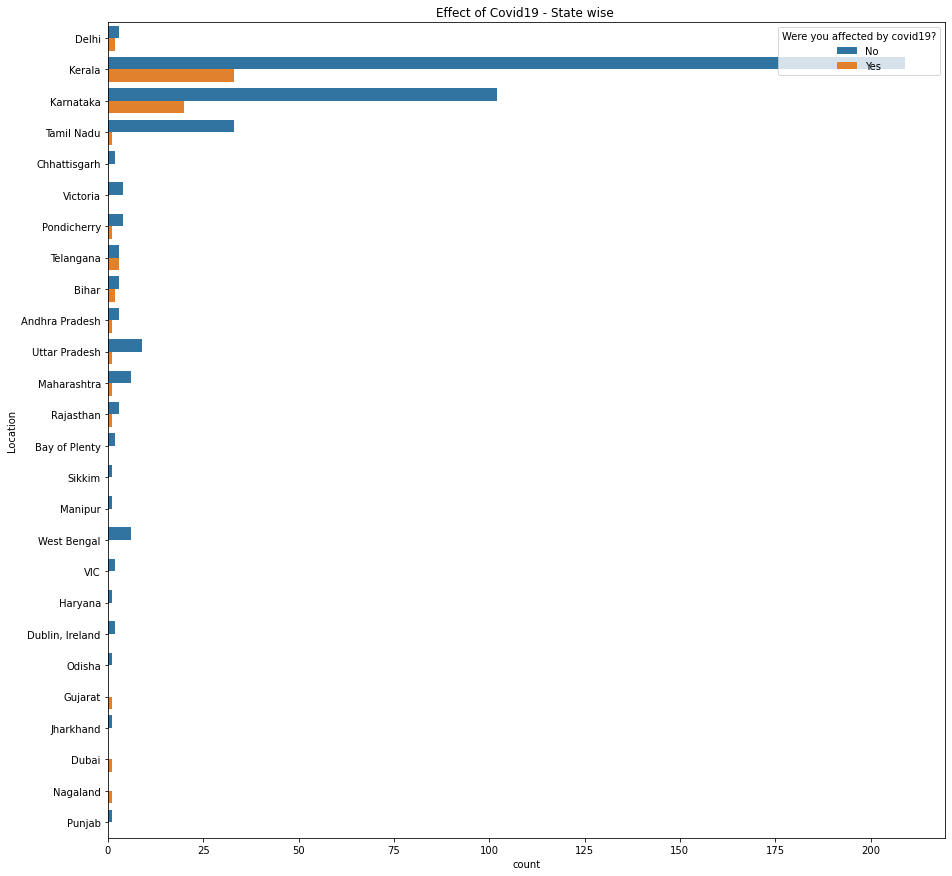

In [11]:
fig,ax = plt.subplots(figsize = (15,15))
sns.countplot(y=data["State"],hue=data["Were you affected by covid19?"])
plt.title("Effect of Covid19 - State wise ")
plt.ylabel("Location")
plt.show()

We can see that during the collection of data, there was only less number of cases in Kerala, Karnataka and Tamil Nadu. But the present situation of these places are worse than ever.

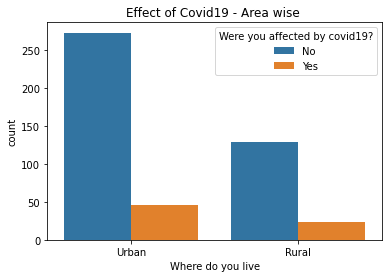

In [12]:
sns.countplot(x=data["Where do you live"],hue=data["Were you affected by covid19?"])
plt.title("Effect of Covid19 - Area wise ")
plt.show()

The above graph show the effect of Covid19 in both Rural and urban cites. As mentioned eariler, the effect of Covid19 was very less then. 

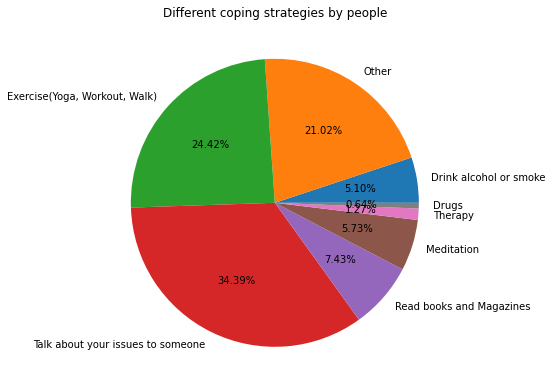

In [13]:
a=list(data['What are your coping strategies to overcome this stress?'].unique())
ss=Counter(data["What are your coping strategies to overcome this stress?"])
ass=list(ss.values())
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = a
students = ass
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.title("Different coping strategies by people")
plt.show()

The above pie chart shows different measures or ways in which people deal with Stress. More than 34% of people finds Talking to someone about the issuses more effective in dealing with stress. About 24% use 	Exercise(Yoga, Workout, Walk) as a way to get relief from stress. Only about 2% of seek medical help.

### Data pre-processing

In [14]:
le = preprocessing.LabelEncoder()
data['Were you affected by covid19?']=le.fit_transform(data['Were you affected by covid19?'])
data['Have you had thoughts about harming yourself after being stressed out?']=le.fit_transform(data['Have you had thoughts about harming yourself after being stressed out?'])
data['Do you have trouble getting to sleep and staying asleep?']=le.fit_transform(data['Do you have trouble getting to sleep and staying asleep?'])
data['Gender']=le.fit_transform(data['Gender'])
data['Where do you live']=le.fit_transform(data['Where do you live'])
data['Marital Status']=le.fit_transform(data['Marital Status'])
data['Occupation']=le.fit_transform(data['Occupation'])
data['Time spend on electronic devices']=le.fit_transform(data['Time spend on electronic devices'])
data['How often do you feel stressed? ']=le.fit_transform(data['How often do you feel stressed? '])
data['Does your day-to-day work routine affect your stress level?']=le.fit_transform(data['Does your day-to-day work routine affect your stress level?'])
data['Where do you think the stress levels are experienced more?']=le.fit_transform(data['Where do you think the stress levels are experienced more?'])
data['Do you lack energy and motivation?']=le.fit_transform(data['Do you lack energy and motivation?'])
data['What are your coping strategies to overcome this stress?']=le.fit_transform(data['What are your coping strategies to overcome this stress?'])
data['What about managing finance during lockdown?']=le.fit_transform(data['What about managing finance during lockdown?'])
data['Age']=le.fit_transform(data['Age'])

In [15]:
data.head()

,Age,Gender,State,Where do you live,Marital Status,Occupation,Time spend on electronic devices,How often do you feel lonely,How often do you feel stressed?,Does your day-to-day work routine affect your stress level?,Where do you think the stress levels are experienced more?,Do you lack energy and motivation?,Have you had thoughts about harming yourself after being stressed out?,Do you have trouble getting to sleep and staying asleep?,What are your coping strategies to overcome this stress?,Were you affected by covid19?,Did you face any physical health issues other than covid19 during lockdown? If yes please specify else mention no,Did you experience some or all of the following? (Tick all the applicable options).,What about managing finance during lockdown?
0,0,1,Delhi,1,2,4,2,3,2,2,0,2,2,2,0,0,0,"Stress, Anxiety, Suicidal Thoughts",1
1,0,1,Kerala,1,2,4,0,2,2,2,2,2,0,2,4,0,1,"Stress, Depression, Anxiety",0
2,1,1,Kerala,0,2,4,2,2,4,1,2,2,0,1,2,0,0,"Stress, Depression",3
3,5,1,Kerala,0,2,4,2,2,4,2,1,1,0,2,6,0,0,Stress,2
4,1,1,Kerala,0,2,4,2,4,2,2,0,1,0,2,4,0,0,"Stress, Anxiety",1


In [16]:
dummies = pd.get_dummies(data['Did you experience some or all of the following? (Tick all the applicable options).'])
merged = pd.concat([data, dummies], axis='columns')
merged=merged.drop("Did you experience some or all of the following? (Tick all the applicable options).",axis=1)

In [17]:
merged.head()

,Age,Gender,State,Where do you live,Marital Status,Occupation,Time spend on electronic devices,How often do you feel lonely,How often do you feel stressed?,Does your day-to-day work routine affect your stress level?,...,"Depression, Anxiety",Stress,"Stress, Anxiety","Stress, Anxiety, Suicidal Thoughts","Stress, Depression","Stress, Depression, Anxiety","Stress, Depression, Anxiety, Suicidal Thoughts","Stress, Depression, Suicidal Thoughts","Stress, Suicidal Thoughts",Suicidal Thoughts
0,0,1,Delhi,1,2,4,2,3,2,2,...,0,0,0,1,0,0,0,0,0,0
1,0,1,Kerala,1,2,4,0,2,2,2,...,0,0,0,0,0,1,0,0,0,0
2,1,1,Kerala,0,2,4,2,2,4,1,...,0,0,0,0,1,0,0,0,0,0
3,5,1,Kerala,0,2,4,2,2,4,2,...,0,1,0,0,0,0,0,0,0,0
4,1,1,Kerala,0,2,4,2,4,2,2,...,0,0,1,0,0,0,0,0,0,0


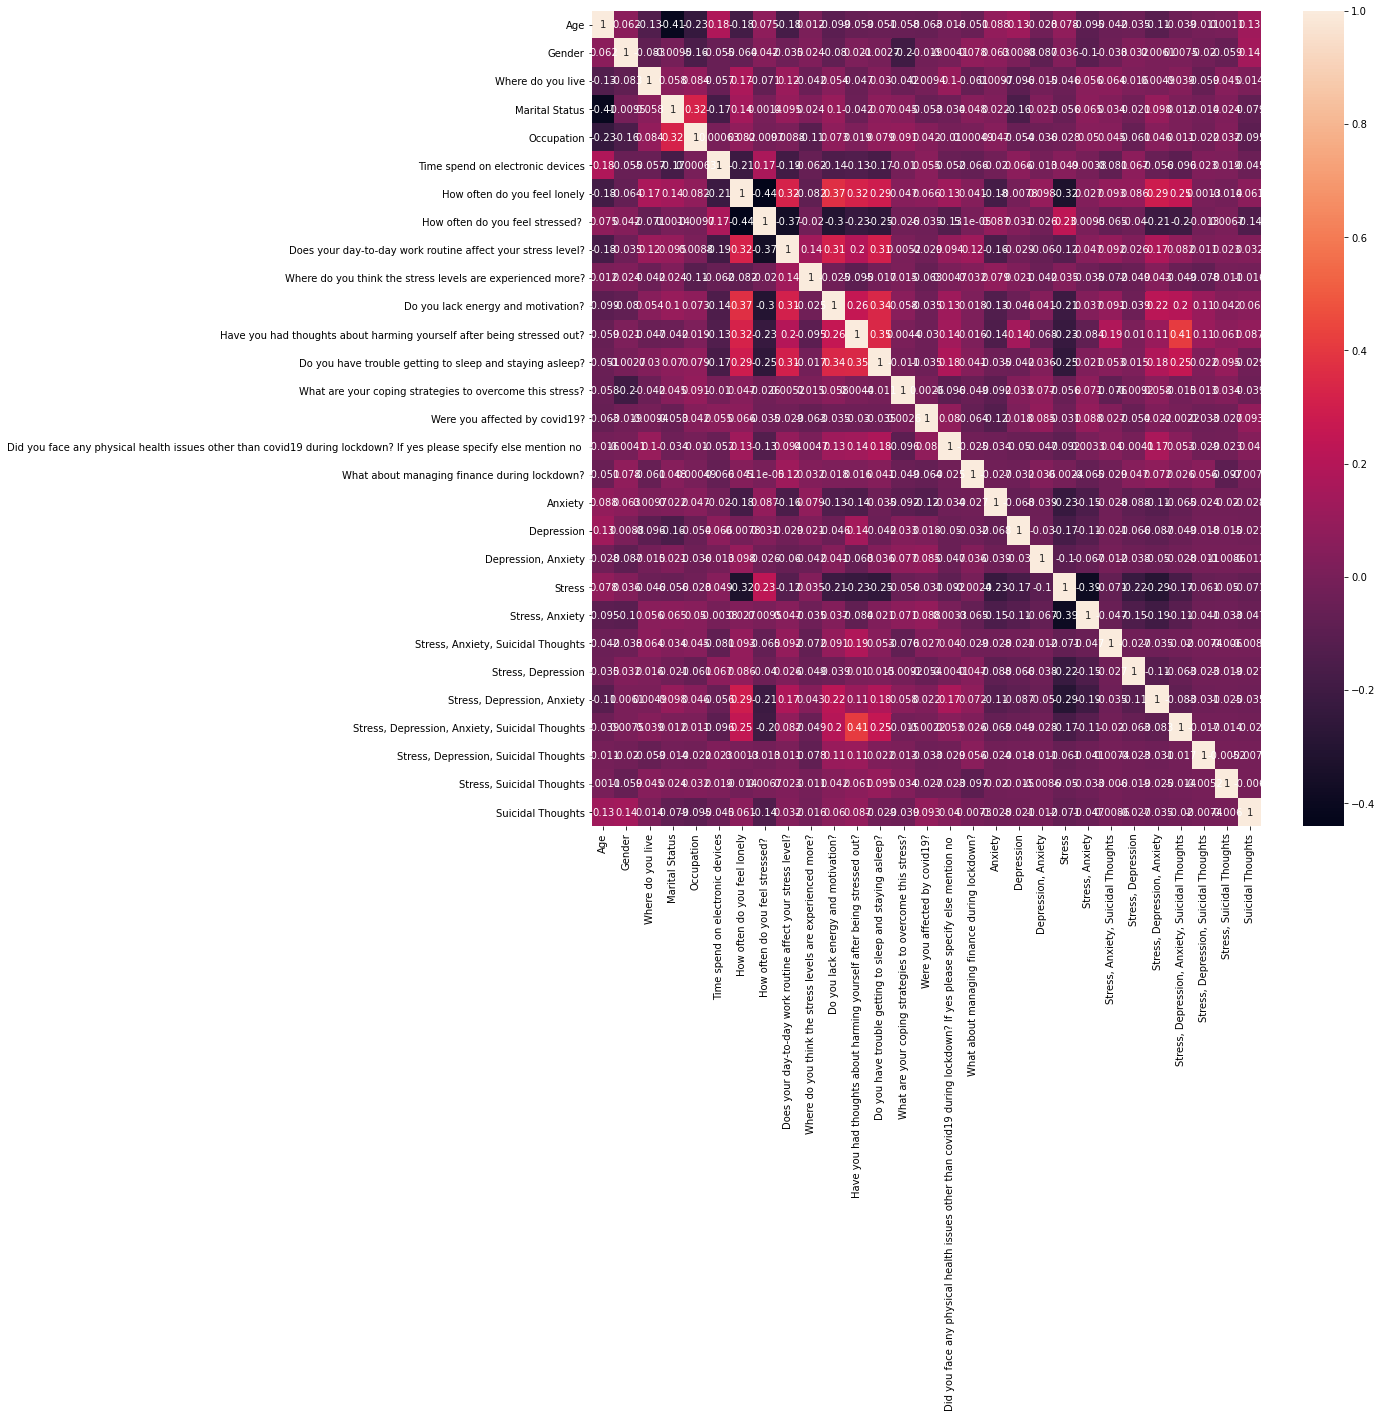

In [18]:
fig,ax = plt.subplots(figsize = (15,15))
sns.heatmap(merged.corr(),annot = True)
plt.show()

In [19]:
X=merged.drop(["How often do you feel stressed? ","State"],axis=1)
Y=merged["How often do you feel stressed? "]

In [20]:
merged["How often do you feel stressed? "].value_counts()

4    214
2    145
3     67
0     39
1      6
Name: How often do you feel stressed? , dtype: int64

### Random Under Sampleing

In [21]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, Y)
print('original dataset shape:', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({4: 214, 2: 145, 3: 67, 0: 39, 1: 6})
Resample dataset shape Counter({0: 6, 1: 6, 2: 6, 3: 6, 4: 6})


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


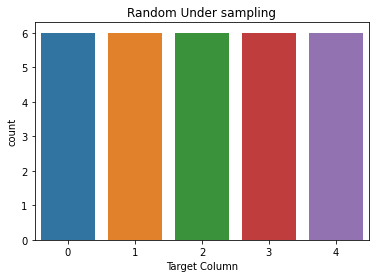

In [22]:
sns.countplot(y_rus)
plt.title("Random Under sampling")
plt.xlabel("Target Column")
plt.show()

### Model building Random Under Sampleing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.3,random_state=0)

In [24]:
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         2
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         4

    accuracy                           0.22         9
   macro avg       0.17      0.30      0.21         9
weighted avg       0.13      0.22      0.16         9



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [25]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
lr_predict
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2
           2       0.25      0.50      0.33         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         4

    accuracy                           0.22         9
   macro avg       0.15      0.20      0.17         9
weighted avg       0.17      0.22      0.19         9



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no 

In [26]:
knn = KNeighborsClassifier(n_neighbors=1,metric="chebyshev")
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.50      0.67         2
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         4

    accuracy                           0.33         9
   macro avg       0.33      0.30      0.29         9
weighted avg       0.37      0.33      0.33         9



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         2
           2       0.40      1.00      0.57         2
           4       0.00      0.00      0.00         4

    accuracy                           0.44         9
   macro avg       0.23      0.50      0.31         9
weighted avg       0.20      0.44      0.28         9



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
conclusion = pd.DataFrame({'models': ["SVC","KNN","Logistic Regression","RandomForestClassifier"],
                           'accuracies': [accuracy_score(y_test,pred_svc)*100,accuracy_score(y_test,pred_knn)*100,accuracy_score(y_test, lr_predict)*100,accuracy_score(y_test, pred_rfc)*100]})
conclusion

,models,accuracies
0,SVC,22.222222
1,KNN,33.333333
2,Logistic Regression,22.222222
3,RandomForestClassifier,44.444444


### Sampling using SMOTE

In [29]:
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)
print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({4: 214, 2: 145, 3: 67, 0: 39, 1: 6})
Resample dataset shape Counter({2: 214, 4: 214, 3: 214, 0: 214, 1: 214})


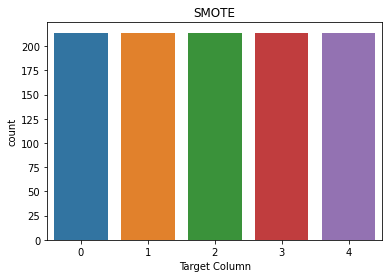

In [30]:
sns.countplot(x=y_smote)
plt.title("SMOTE")
plt.xlabel("Target Column")
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3,random_state=0)

### Model using SMOTE

In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        61
           1       1.00      1.00      1.00        69
           2       0.68      0.70      0.69        60
           3       0.73      0.87      0.79        67
           4       0.65      0.48      0.55        64

    accuracy                           0.81       321
   macro avg       0.80      0.80      0.80       321
weighted avg       0.80      0.81      0.80       321



In [33]:
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        61
           1       0.91      1.00      0.95        69
           2       0.48      0.52      0.50        60
           3       0.68      0.66      0.67        67
           4       0.56      0.45      0.50        64

    accuracy                           0.68       321
   macro avg       0.67      0.67      0.67       321
weighted avg       0.67      0.68      0.67       321



In [34]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
lr_predict
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        61
           1       0.87      1.00      0.93        69
           2       0.50      0.50      0.50        60
           3       0.70      0.60      0.65        67
           4       0.55      0.56      0.56        64

    accuracy                           0.69       321
   macro avg       0.68      0.68      0.68       321
weighted avg       0.68      0.69      0.68       321



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        61
           1       0.87      1.00      0.93        69
           2       0.64      0.62      0.63        60
           3       0.75      0.76      0.76        67
           4       0.50      0.25      0.33        64

    accuracy                           0.73       321
   macro avg       0.70      0.73      0.70       321
weighted avg       0.70      0.73      0.70       321



In [36]:
conclusion = pd.DataFrame({'models': ["SVC","KNN","Logistic Regression","RandomForestClassifier"],
                           'accuracies': [accuracy_score(y_test,pred_svc)*100,accuracy_score(y_test,pred_knn)*100,accuracy_score(y_test, lr_predict)*100,accuracy_score(y_test, pred_rfc)*100]})
conclusion

,models,accuracies
0,SVC,67.912773
1,KNN,72.897196
2,Logistic Regression,68.847352
3,RandomForestClassifier,80.685358


## Random Over sampling

In [37]:
ros = RandomOverSampler(random_state=42)
# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, Y)
print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({4: 214, 2: 145, 3: 67, 0: 39, 1: 6})
Resample dataset shape Counter({2: 214, 4: 214, 3: 214, 0: 214, 1: 214})


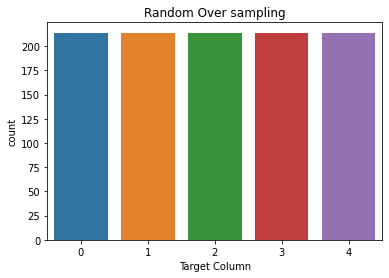

In [38]:
sns.countplot(x=y_ros)
plt.title("Random Over sampling")
plt.xlabel("Target Column")
plt.show()

### Model using Random Over sampling

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3,random_state=0)

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        61
           1       1.00      1.00      1.00        69
           2       0.78      0.75      0.76        60
           3       0.85      0.93      0.89        67
           4       0.77      0.64      0.70        64

    accuracy                           0.87       321
   macro avg       0.86      0.86      0.86       321
weighted avg       0.86      0.87      0.86       321



In [41]:
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76        61
           1       0.97      1.00      0.99        69
           2       0.54      0.55      0.55        60
           3       0.68      0.78      0.72        67
           4       0.60      0.47      0.53        64

    accuracy                           0.72       321
   macro avg       0.71      0.71      0.71       321
weighted avg       0.71      0.72      0.71       321



In [42]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
lr_predict
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.60      0.72      0.66        61
           1       0.88      1.00      0.94        69
           2       0.43      0.37      0.40        60
           3       0.65      0.63      0.64        67
           4       0.52      0.44      0.47        64

    accuracy                           0.64       321
   macro avg       0.62      0.63      0.62       321
weighted avg       0.62      0.64      0.63       321



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
knn = KNeighborsClassifier(n_neighbors=1,metric="chebyshev")
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        61
           1       0.96      1.00      0.98        69
           2       0.79      0.62      0.69        60
           3       0.79      0.90      0.84        67
           4       0.64      0.42      0.51        64

    accuracy                           0.79       321
   macro avg       0.78      0.79      0.77       321
weighted avg       0.78      0.79      0.78       321



In [44]:
ROS = pd.DataFrame({'models': ["SVC","KNN","Logistic Regression","RandomForestClassifier"],
                           'accuracies': [accuracy_score(y_test,pred_svc)*100,accuracy_score(y_test,pred_knn)*100,accuracy_score(y_test, lr_predict)*100,accuracy_score(y_test, pred_rfc)*100]})
ROS

,models,accuracies
0,SVC,71.962617
1,KNN,79.127726
2,Logistic Regression,63.862928
3,RandomForestClassifier,86.604361


In [45]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
pred_xg = xg.predict(X_test)
print(classification_report(y_test, pred_xg))
print("The accuracy is = ",accuracy_score(y_test,pred_xg)*100)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:47:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       0.99      1.00      0.99        69
           2       0.77      0.77      0.77        60
           3       0.85      0.96      0.90        67
           4       0.74      0.61      0.67        64

    accuracy                           0.87       321
   macro avg       0.86      0.87      0.86       321
weighted avg       0.86      0.87      0.86       321

The accuracy is =  86.91588785046729
